In [1]:
import pandas as pd 
import numpy as np
import yfinance as yf
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
ticker = ["BTC-USD",
          "ETH-USD",
          "BNB-USD",
          "SOL-USD", 
          "XRP-USD", 
          "DOGE-USD", 
          "TRX-USD",
          "TON-USD",
          "ADA-USD",
          "AVAX-USD"]

In [ ]:
#ticker = ["BTC-USD","ETH-USD" ,"BNB-USD"]

In [5]:
data = yf.download(ticker, period='5y',interval='1d')

[*********************100%%**********************]  10 of 10 completed


In [6]:
df = data.loc[:,"Close"].copy()
df = df.dropna()
df

Ticker,ADA-USD,AVAX-USD,BNB-USD,BTC-USD,DOGE-USD,ETH-USD,SOL-USD,TON-USD,TRX-USD,XRP-USD
Date,,,,,,,,,,
2020-09-22,0.081754,5.234632,24.100740,10538.459961,0.002656,344.503174,2.915519,3.415784,0.025044,0.233417
2020-09-23,0.076763,4.118469,22.856977,10246.186523,0.002560,321.116302,2.836757,3.267454,0.024859,0.221221
2020-09-24,0.082817,4.566561,24.613825,10760.066406,0.002628,349.355591,3.132715,3.433490,0.026193,0.232905
2020-09-25,0.096845,4.712279,24.663387,10692.716797,0.002698,352.183258,3.188612,3.412644,0.027151,0.241922
2020-09-26,0.095564,4.539249,26.221182,10750.723633,0.002716,355.488098,3.134703,3.385257,0.027251,0.242160
...,...,...,...,...,...,...,...,...,...,...
2024-09-11,0.353054,23.296936,530.194031,57343.171875,0.101378,2339.841553,132.497391,0.958374,0.153369,0.535312
2024-09-12,0.356293,24.028889,544.303772,58127.011719,0.102799,2361.781738,136.141907,0.970610,0.151974,0.562576
2024-09-13,0.360900,24.952272,557.018066,60571.300781,0.107114,2441.607178,139.100540,1.019919,0.149071,0.573149


In [7]:
log_returns = np.log(df / df.shift(1)).dropna()

mean_log_returns = log_returns.mean()

confidence_level = 0.95
VaR_log = log_returns.quantile(1 - confidence_level)
CVaR_log = log_returns[log_returns < VaR_log].mean()


annualized_log_return = mean_log_returns * 252 * 100
annualized_cvar_log = CVaR_log * np.sqrt(252) * -100

summary_log = pd.DataFrame({
    "Return": annualized_log_return,
    "Risk": annualized_cvar_log
})

In [8]:
summary_log

,Return,Risk
Ticker,,
ADA-USD,25.207396,171.925885
AVAX-USD,26.979295,223.197994
BNB-USD,54.523254,160.409277
BTC-USD,30.203888,123.118042
DOGE-USD,63.798929,217.865225
ETH-USD,33.755484,158.346612
SOL-USD,66.622839,222.063786
TON-USD,-21.172115,253.588864
TRX-USD,30.736117,159.784711


In [9]:
plt.style.use("seaborn")

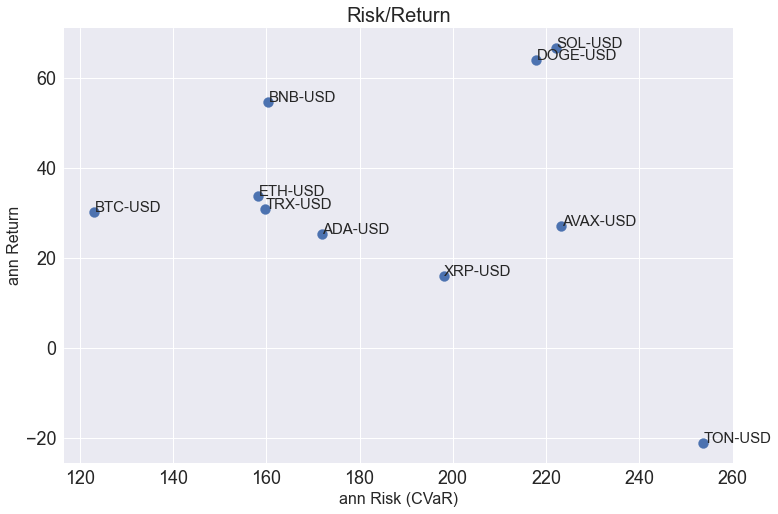

In [10]:
summary_log.plot(kind="scatter", x="Risk", y="Return", figsize=(12, 8), s=100, fontsize=18)

for i in summary_log.index:
    plt.annotate(i, xy=(summary_log.loc[i, "Risk"] + 0.1, summary_log.loc[i, "Return"] + 0.1), size=15)

plt.xlabel("ann Risk (CVaR)", fontsize=16)
plt.ylabel("ann Return", fontsize=16)
plt.title("Risk/Return", fontsize=20)
plt.show()


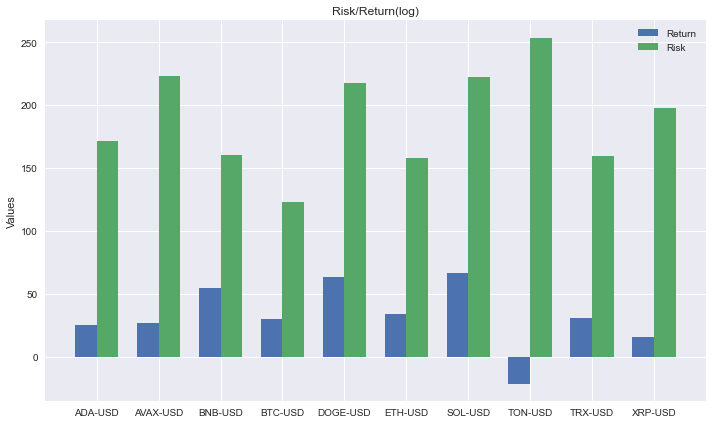

In [11]:
# Bar chart parameters
bar_width = 0.35
index = range(len(summary_log))

# Create the bar plot
fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(index, summary_log['Return'], bar_width, label='Return')  # , color='blue'
bar2 = ax.bar([i + bar_width for i in index], summary_log['Risk'], bar_width, label='Risk') # , color='red'

# Add labels, title, and legend
#ax.set_xlabel('Tickers')
ax.set_ylabel('Values')
ax.set_title('Risk/Return(log)')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(summary_log.index)
ax.legend()

plt.tight_layout()
plt.show()
